In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r"C:\Ecommerce_data.csv")

In [3]:
data.head()

,customer_id,customer_first_name,customer_last_name,category_name,product_name,customer_segment,customer_city,customer_state,customer_country,customer_region,...,order_date,order_id,ship_date,shipping_type,days_for_shipment_scheduled,days_for_shipment_real,order_item_discount,sales_per_order,order_quantity,profit_per_order
0,C_ID_45866,Mary,Fuller,Office Supplies,Xerox 1913,Corporate,New Rochelle,New York,United States,East,...,11/5/2022,O_ID_3001072,11/7/2022,Second Class,2,2,35.0,500.0,5,223.199997
1,C_ID_44932,Alan,Edelman,Office Supplies,#6 3/4 Gummed Flap White Envelopes,Corporate,Houston,Texas,United States,Central,...,20-06-2022,O_ID_3009170,23-06-2022,Second Class,2,3,85.0,500.0,5,199.199997
2,C_ID_70880,Mary,Gayman,Office Supplies,Belkin 8 Outlet Surge Protector,Consumer,Louisville,Kentucky,United States,South,...,25-06-2022,O_ID_3047567,30-06-2022,Standard Class,4,5,75.0,44.0,5,195.500000
3,C_ID_33157,Raymond,Eason,Office Supplies,GBC VeloBinder Manual Binding System,Corporate,Chicago,Illinois,United States,Central,...,10/6/2022,O_ID_3060575,10/10/2022,Second Class,2,4,60.0,254.0,1,220.000000
4,C_ID_58303,Mary,Gonzalez,Furniture,Eldon Pizzaz Desk Accessories,Home Office,Philadelphia,Pennsylvania,United States,East,...,2/5/2022,O_ID_3064311,8/1/2022,First Class,1,2,125.0,500.0,1,97.500000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113270 entries, 0 to 113269
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   customer_id                  113270 non-null  object 
 1   customer_first_name          113270 non-null  object 
 2   customer_last_name           113270 non-null  object 
 3   category_name                113270 non-null  object 
 4   product_name                 113270 non-null  object 
 5   customer_segment             113270 non-null  object 
 6   customer_city                113270 non-null  object 
 7   customer_state               113270 non-null  object 
 8   customer_country             113270 non-null  object 
 9   customer_region              113270 non-null  object 
 10  delivery_status              113270 non-null  object 
 11  order_date                   113270 non-null  object 
 12  order_id                     113270 non-null  object 
 13 

In [5]:
data.describe()

,days_for_shipment_scheduled,days_for_shipment_real,order_item_discount,sales_per_order,order_quantity,profit_per_order
count,113270.000000,113270.000000,113270.000000,113270.000000,113270.000000,113270.000000
mean,2.931209,3.464006,21.105465,204.499537,1.967564,23.069382
std,1.375914,1.632198,22.959207,141.443090,1.355254,105.288561
min,0.000000,0.000000,0.000000,9.990000,1.000000,-3366.000000
25%,2.000000,2.000000,5.500000,119.980003,1.000000,7.200000
50%,4.000000,3.000000,14.400000,199.919998,1.000000,32.029999
75%,4.000000,5.000000,30.000000,299.950012,3.000000,65.570000
max,4.000000,6.000000,500.000000,1999.989990,5.000000,2600.000000


In [6]:
# Mehrere Dezimalstellen nach komma, können sinnvoll sein, wenn man hohe Präzision benötigt
# Wenn man möchte kann man die Float Werte auf 2 Dezimalstellen formatieren für bessere Lesbarkeit
pd.options.display.float_format = '{:.2f}'.format

In [7]:
# Überprüfen auf fehlende Werte
print("\nFehlende Werte pro Spalte:")
print(data.isnull().sum())


Fehlende Werte pro Spalte:
customer_id                    0
customer_first_name            0
customer_last_name             0
category_name                  0
product_name                   0
customer_segment               0
customer_city                  0
customer_state                 0
customer_country               0
customer_region                0
delivery_status                0
order_date                     0
order_id                       0
ship_date                      0
shipping_type                  0
days_for_shipment_scheduled    0
days_for_shipment_real         0
order_item_discount            0
sales_per_order                0
order_quantity                 0
profit_per_order               0
dtype: int64


In [8]:
# Gesamtzahl der Kunden berechnen
unique_customers = data["customer_id"].nunique()
print(f"Anzahl der Kunden:   {unique_customers}")

Anzahl der Kunden:   42047


In [9]:
# Gesamtumsatz berechnen
data["total_sales"] = data["sales_per_order"]*data["order_quantity"]
data["total_sales"] = data["total_sales"].round(2)
print(data["total_sales"].sum())

47901996.72


In [10]:
# Welche Produkten wurden am häufigsen verkauft?
most_sold_product = data["product_name"].value_counts().head(10)
print(f"\n      Die Top 10 meistverkauften Produkte")
print(most_sold_product)


      Die Top 10 meistverkauften Produkte
product_name
Staples                                       556
Staple envelope                               537
Easy-staple paper                             510
KI Adjustable-Height Table                    226
Avery Non-Stick Binders                       224
Staples in misc. colors                       210
Staple remover                                199
Storex Dura Pro Binders                       189
Staple-based wall hangings                    176
Situations Contoured Folding Chairs, 4/Set    167
Name: count, dtype: int64


In [11]:
# Gesamt Umsatz pro Produkt berechnen
product_sales = data.groupby("product_name")["total_sales"].sum().sort_values(ascending=False)
print(product_sales.head(10))

product_name
Staples                                      242643.17
Staple envelope                              241609.46
Easy-staple paper                            204520.93
Avery Non-Stick Binders                      100113.61
Staples in misc. colors                       96262.85
KI Adjustable-Height Table                    90458.91
Bretford Rectangular Conference Table Tops    85026.59
Staple-based wall hangings                    78281.36
Zipper Ring Binder Pockets                    75901.94
Staple remover                                74464.41
Name: total_sales, dtype: float64


In [12]:
# Gesamtprofit berechnen
data["total_profit"] = data["profit_per_order"]*data["order_quantity"]
print(data["total_profit"].sum())

5449469.520567953


In [13]:
# Region mit am meistprofit 
most_profit_region = data.groupby("customer_region")["total_profit"].sum().sort_values(ascending=False)
print(most_profit_region.head(1))

customer_region
West   1799223.33
Name: total_profit, dtype: float64


In [14]:
# Die Top 5 States mit dem höhsten Umsatz
top_states = data.groupby("customer_state")["total_sales"].sum().sort_values(ascending=False)
print(f"\n    Die Top 5 States nach Umsatz")  
print(top_states.head())


    Die Top 5 States nach Umsatz
customer_state
California     9670468.12
New York       5333703.45
Texas          4764630.53
Pennsylvania   2843631.07
Washington     2424917.36
Name: total_sales, dtype: float64


In [15]:
# Umwandeln der Datumspalte in datetime-Format
data["order_date"] = pd.to_datetime(data["order_date"], format="mixed")
data["YearMonth"] = data["order_date"].dt.to_period("M")

In [16]:
# Gesamtumsatz pro Monat
monthly_sales = data.groupby("YearMonth")["total_sales"].sum()
print("n\  Gesamtumsatz pro Monat")
print(monthly_sales)

n\  Gesamtumsatz pro Monat
YearMonth
2021-01   1966881.20
2021-02   1781858.57
2021-03   1893192.70
2021-04   1957366.93
2021-05   1886855.85
2021-06   1917243.46
2021-07   1944639.40
2021-08   1894834.02
2021-09   1863638.44
2021-10   1944120.58
2021-11   1894531.41
2021-12   1898261.93
2022-01   2202903.73
2022-02   2091005.62
2022-03   2052980.33
2022-04   1943924.03
2022-05   2172871.52
2022-06   1886130.74
2022-07   2233679.53
2022-08   2084326.01
2022-09   2072578.69
2022-10   3228025.97
2022-11   1701675.86
2022-12   1388470.20
Freq: M, Name: total_sales, dtype: float64


In [17]:
# Durchschnittlicher Umsatz pro Kunde
customer_sales = data.groupby('customer_id')['total_sales'].sum()
print(f"Durchschnittlicher Umsatz pro Kunde: {customer_sales.mean():.2f}")

Durchschnittlicher Umsatz pro Kunde: 1139.25


In [18]:
# Kundenklassifikation (RFM-Analyse - Recency, Frequency, Monetary Value)
rfm = data.groupby('customer_id').agg({
    'order_date': lambda x: (data['order_date'].max() - x.max()).days,
    'order_id': 'count',
    'total_sales': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
print("\nErgebnisse der RFM-Analyse (Top 5):")
print(rfm.head())


Ergebnisse der RFM-Analyse (Top 5):
             Recency  Frequency  Monetary
customer_id                              
C_ID_25005        57          3    989.89
C_ID_25006       498          2    259.96
C_ID_25007       114          5    919.94
C_ID_25008         8          5    730.66
C_ID_25009       230          4   3361.29


In [19]:
# Einstellungen für die Datenvisualisierung 
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

Text(0.5, 1.0, 'Verteilung des Umsatzes pro Kunde')

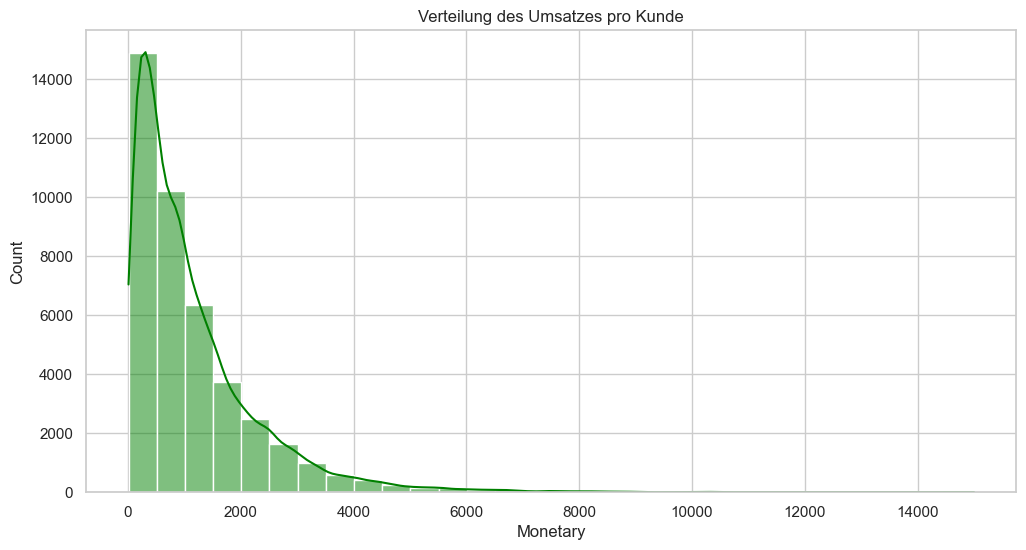

In [20]:
# Visualisierung von RFM-Komponenten
sns.histplot(rfm['Monetary'], bins=30, kde=True, color='green')
plt.title('Verteilung des Umsatzes pro Kunde')

Text(0.5, 0, 'Monat')

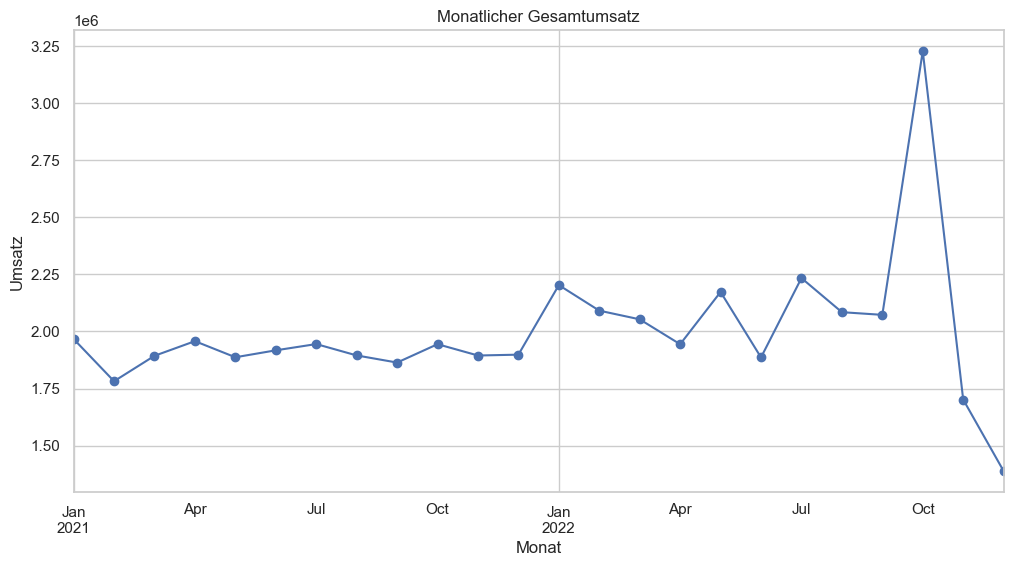

In [21]:
# Visualisierung der monatlichen Umsatz
monthly_sales.plot(kind="line", title="Monatlicher Gesamtumsatz", marker="o")
plt.ylabel("Umsatz")
plt.xlabel("Monat")

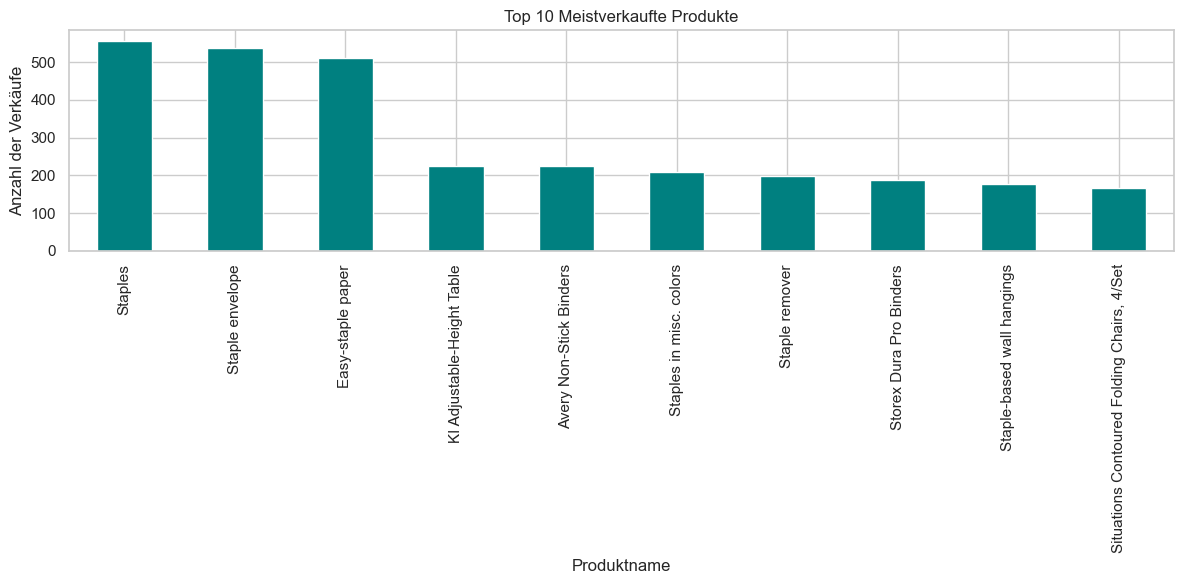

In [22]:
# Erstellen ein Balkendiagramm der meistverfkauften Produkte
most_sold_product.plot(kind="bar", title="Top 10 Meistverkaufte Produkte", color="teal")
plt.ylabel("Anzahl der Verkäufe")
plt.xlabel("Produktname")
plt.tight_layout()

Text(0.5, 0, 'Umsatz')

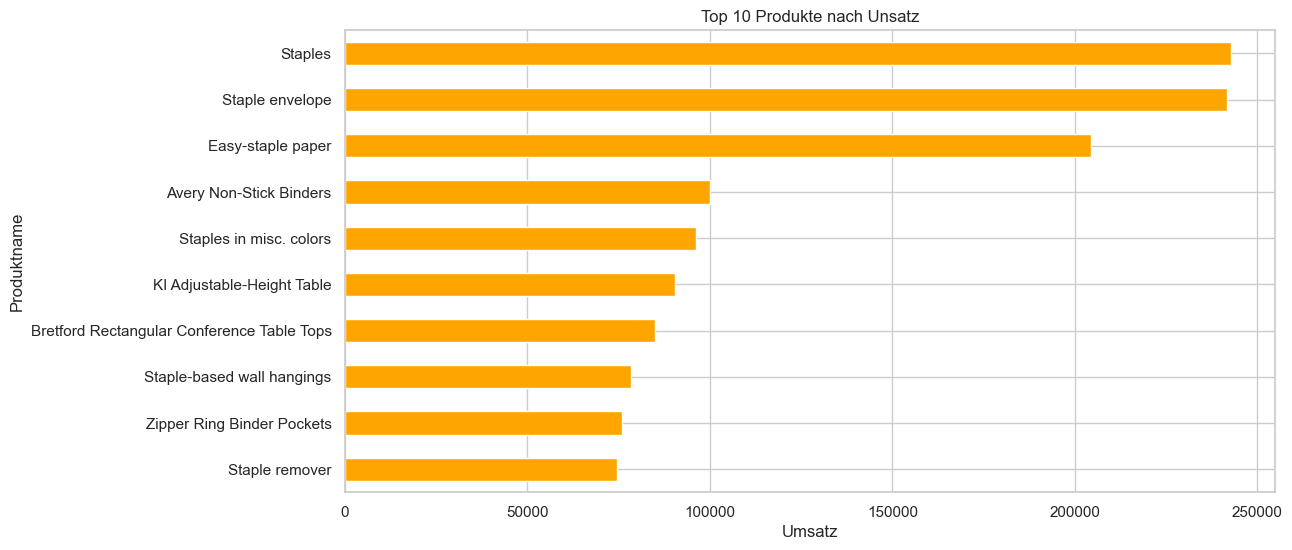

In [23]:
# Visualisieren den Gesamtumsatz pro Produkten
product_sales.head(10).iloc[::-1].plot(kind="barh", title="Top 10 Produkte nach Unsatz", color="orange")
plt.ylabel("Produktname")
plt.xlabel("Umsatz")

Text(0, 0.5, '')

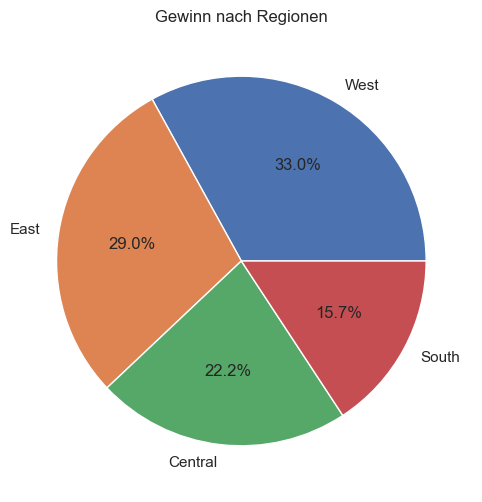

In [24]:
# Verteilung der Gewinn nach Regionen
most_profit_region.plot(kind="pie", autopct="%1.1f%%", title="Gewinn nach Regionen")
plt.ylabel("")

Text(0, 0.5, 'Anzahl der Bestullungen')

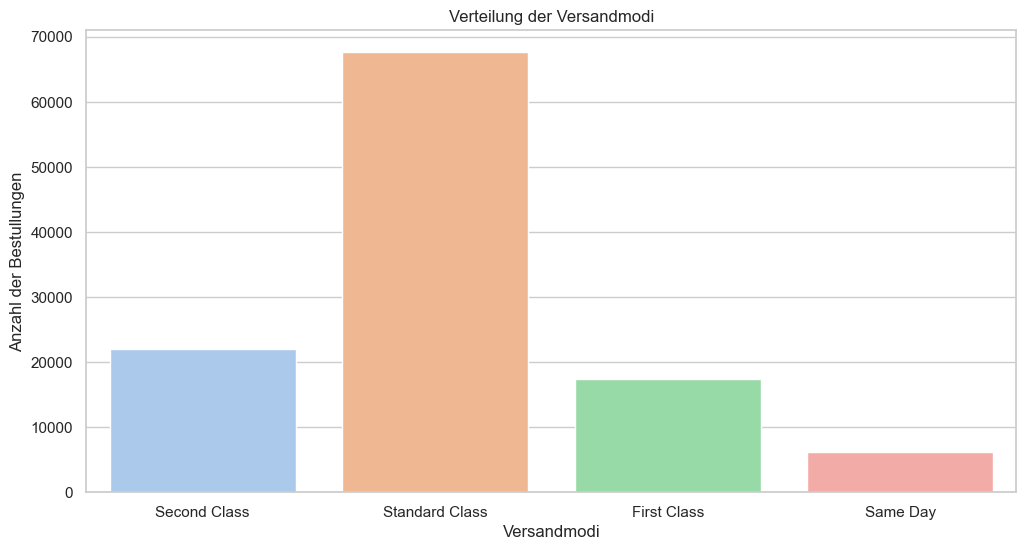

In [25]:
# Verteilung der verschiedenen Versandmodi
sns.countplot(data=data, x="shipping_type", palette="pastel")
plt.title("Verteilung der Versandmodi")
plt.xlabel("Versandmodi")
plt.ylabel("Anzahl der Bestullungen")

Text(0.5, 0, 'Kategorien')

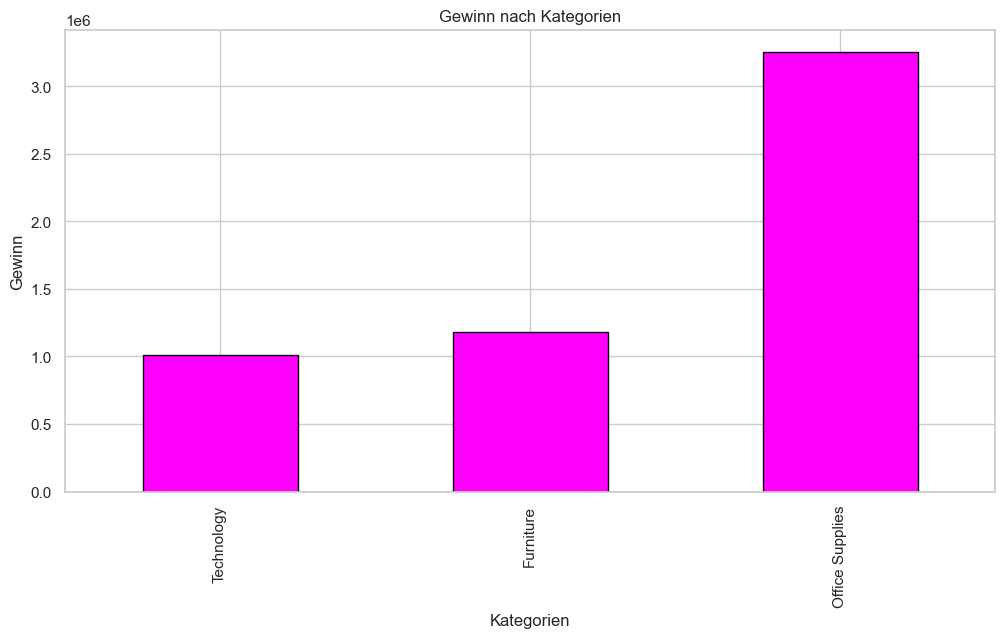

In [27]:
category = data.groupby("category_name")["total_profit"].sum().sort_values()
category.plot(kind="bar", color="fuchsia", edgecolor="black")
plt.title("Gewinn nach Kategorien")
plt.ylabel("Gewinn")
plt.xlabel("Kategorien")

In [ ]:
# Zusammenfassung der wichtigsten Ergebnisse
# Die meistverkauften Produkte und umsatzstärksten Artikel wurden identifiziert.
# Umsatztrends zeigen saisonale Schwankungen, die für Marketingstrategien genutzt werden können.
# Die RFM-Analyse ermöglicht eine gezielte  Kundenansprache.
# Die Gewinnanalyse nach Kategorien zeigt, welche Produktgruppen am profitabelsten sind
# Fazit: Datenbasierte Entscheidungen helfen, Umsatzpotenziale optimal zu nutzen.

# Insights:
# - Produkte mit hohem Verkaufsvolumen und hohem Umsatz sind essenziell für den Geschäftserfolg und sollten priorisiert werden.
# - Saisonale Schwankungen bieten Chancen, um Werbekampagnen zeitlich besser zu planen.
# - Die Kundenanalyse zeigt, dass ein kleiner Anteil von Kunden möglicherweise den größten Umsatz generiert. Ein Fokus auf diese Gruppe kann sich lohnen.
